# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-yeniseyskiy
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | ar raqqah
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | coracora
Processing Record 7 of Set 1 | fuding
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | basco
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | dire
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | loa janan
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | 'amran
City not fo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-yeniseyskiy,60.3725,93.0408,256.80,97,100,1.34,RU,1712010969
1,port alfred,-33.5906,26.8910,291.84,93,96,6.85,ZA,1712010969
2,haiku-pauwela,20.9219,-156.3051,299.16,74,40,10.80,US,1712010969
3,ar raqqah,35.9500,39.0167,293.87,38,8,2.23,SY,1712010969
4,st. john's,47.5649,-52.7093,274.70,95,100,3.60,CA,1712010920


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sierra grande,-41.6060,-65.3557,293.05,35,43,4.40,AR,1711575628
1,blackmans bay,-43.0167,147.3167,282.89,82,8,1.47,AU,1711575628
2,longyearbyen,78.2186,15.6401,269.06,63,75,5.14,SJ,1711575628
3,arraial do cabo,-22.9661,-42.0278,297.13,88,75,2.57,BR,1711575629
4,edinburgh of the seven seas,-37.0676,-12.3116,292.50,93,100,11.18,SH,1711575629


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

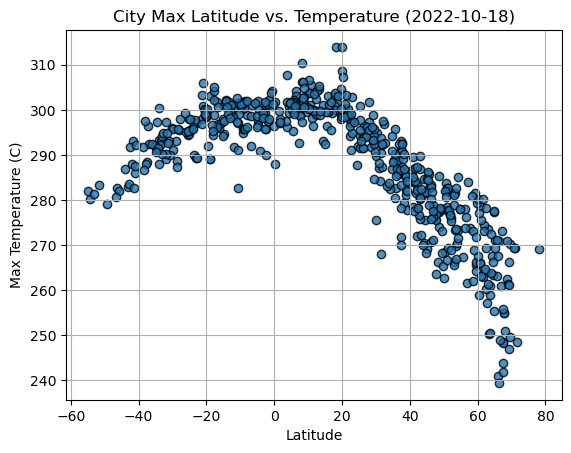

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

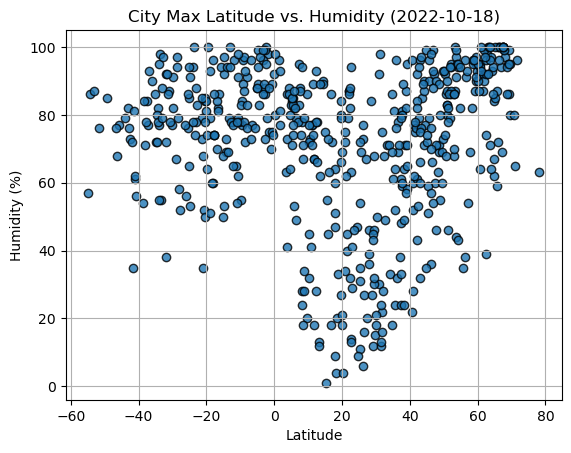

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

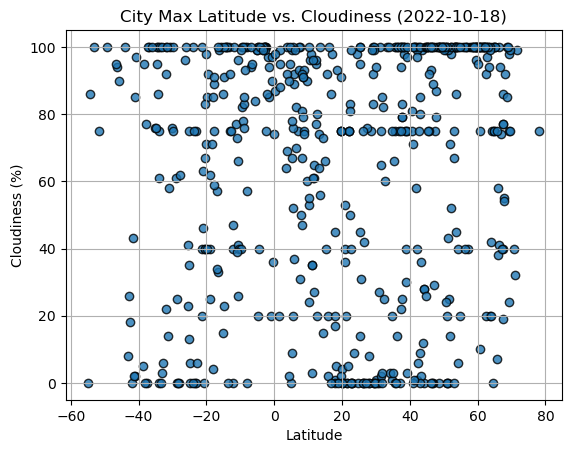

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

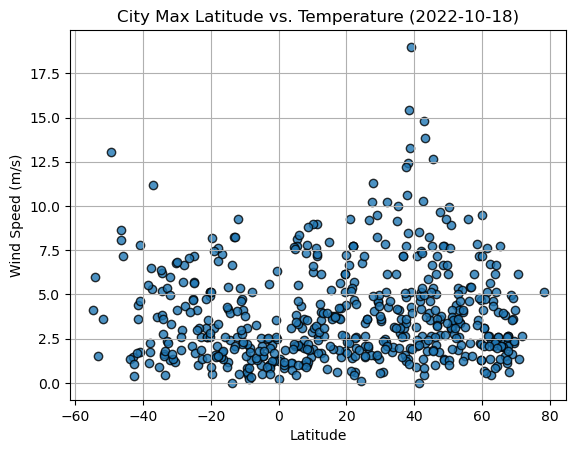

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def Linear_Regression(x_values, y_values, xlabel, ylabel, xpos, ypos):

    ## Convert to floats and store Poverty Rate and Bank Count as x and y values
    x_values = x_values.astype("float")
    y_values = y_values.astype("float")

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (xpos, ypos), fontsize=15,color="red")

    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,269.06,63,75,5.14,SJ,1711575628
5,klyuchi,52.2667,79.1667,275.89,95,98,4.42,RU,1711575629
6,sasovo,54.3537,41.9199,273.22,94,6,4.02,RU,1711575629
9,sao tome,0.3365,6.7273,301.79,80,87,1.36,ST,1711575630
10,dukhan,25.4297,50.7858,294.22,54,45,1.46,QA,1711575630


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sierra grande,-41.6060,-65.3557,293.05,35,43,4.40,AR,1711575628
1,blackmans bay,-43.0167,147.3167,282.89,82,8,1.47,AU,1711575628
3,arraial do cabo,-22.9661,-42.0278,297.13,88,75,2.57,BR,1711575629
4,edinburgh of the seven seas,-37.0676,-12.3116,292.50,93,100,11.18,SH,1711575629
7,uturoa,-16.7333,-151.4333,301.71,70,57,7.30,PF,1711575629


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7921562680987306


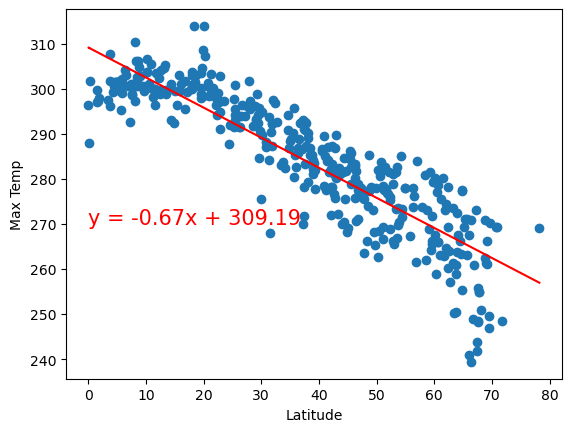

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
Linear_Regression(x_values, y_values, "Latitude", "Max Temp", 0, 270)

R squared: 0.5054113753433271


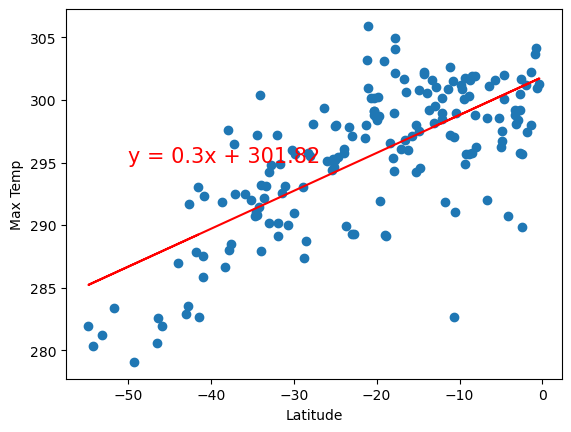

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
Linear_Regression(x_values, y_values, "Latitude", "Max Temp", -50, 295)

**Discussion about the linear relationship:** What we see in the 2 graphs can be summarized as follows: In the northern hemisphere, when latitude increases we see that the temperature goes down. In the south, when latitude increases so too does the temperature.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.13360662906293708


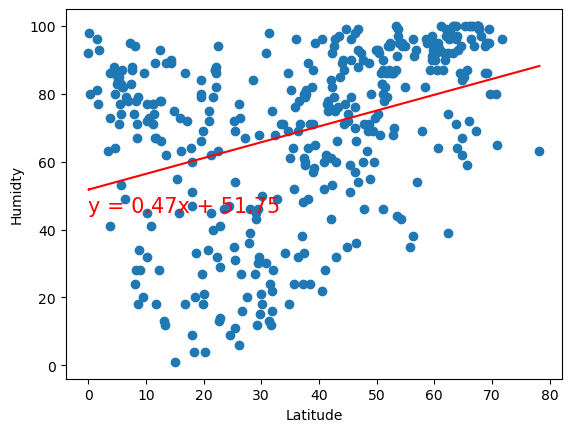

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
Linear_Regression(x_values, y_values, "Latitude", "Humidty", 0, 45)

R squared: 0.05539531837418291


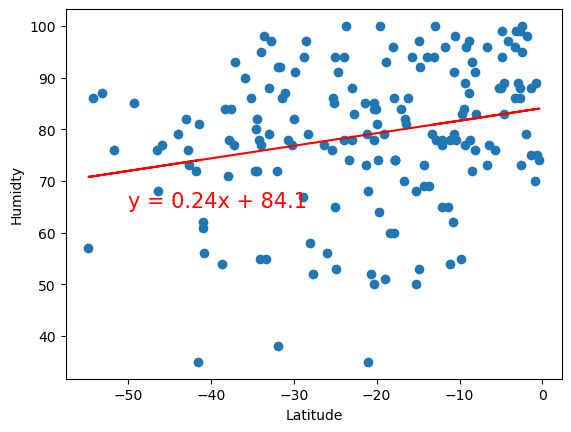

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
Linear_Regression(x_values, y_values, "Latitude", "Humidty", -50, 65)

**Discussion about the linear relationship:** In both the northern and southern hemispheres we see that as lattitude increases so too does humidity increase.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.028610592230844143


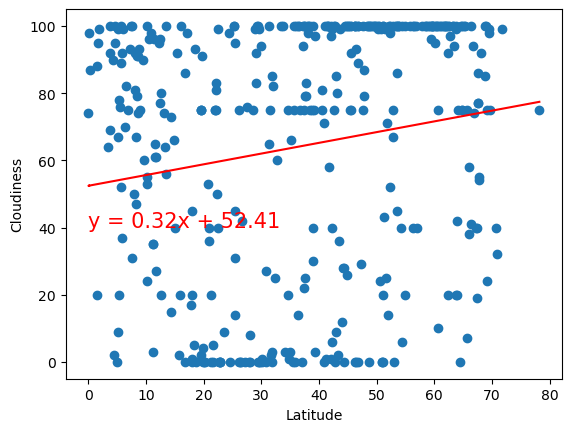

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
Linear_Regression(x_values, y_values, "Latitude", "Cloudiness", 0, 40)

R squared: 0.04886770272105097


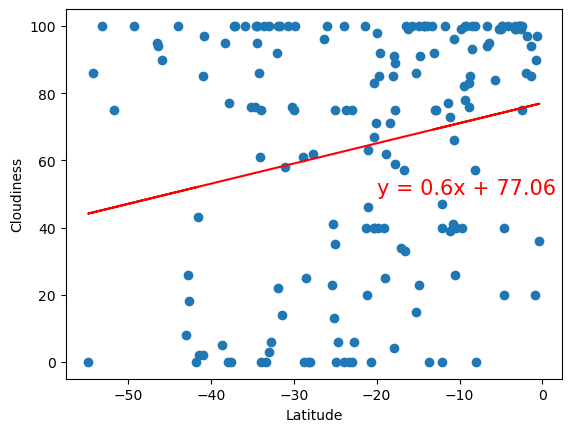

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
Linear_Regression(x_values, y_values, "Latitude", "Cloudiness", -20, 50)

**Discussion about the linear relationship:** In both plots, as latitude increases so too does cloudiness...although the line really doesn't fit the graph that well. There isn't a strong relationship between the two.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.00018048880946188513


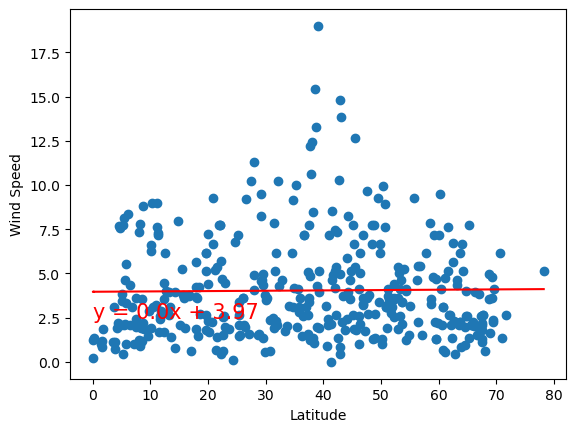

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
Linear_Regression(x_values, y_values, "Latitude", "Wind Speed", 0, 2.5)

R squared: 0.09411825610190239


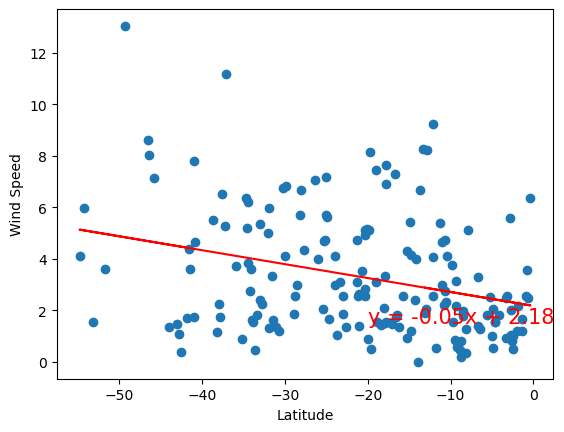

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
Linear_Regression(x_values, y_values, "Latitude", "Wind Speed", -20, 1.5)

**Discussion about the linear relationship:** In the northern hemisphere their really isn't an increase or decrease with latitude for wind speed. HOwever, in the south we see that windspeed decreases when latitude increases.